# Итоговая работа.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.optimize import minimize
from scipy.misc import derivative
from sklearn.decomposition import PCA
from scipy.optimize import minimize, rosen, rosen_der
from sympy.solvers.solveset import linsolve
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
# Нужно посчитать самые близкие вектора 15-тимерные (по углам между)
def angle(x,y):
    x_len = pow(np.dot(x,x), 0.5)
    y_len = pow(np.dot(y,y), 0.5)
    _cos = np.dot(x, y) / ( x_len*y_len )
    return np.arccos(_cos)

for numbase, vbase in enumerate(raitings):
    resd = {}
    for num, v in enumerate(raitings):
        if num == numbase:
            pass
        else:
            a = angle(vbase,v)
            resd[f'{num+1}'] = a
    print(f'Для пользователя: {numbase+1} наиболее похожий : {max(resd, key=resd.get)}')

Для пользователя: 1 наиболее похожий : 7
Для пользователя: 2 наиболее похожий : 8
Для пользователя: 3 наиболее похожий : 7
Для пользователя: 4 наиболее похожий : 5
Для пользователя: 5 наиболее похожий : 4
Для пользователя: 6 наиболее похожий : 7
Для пользователя: 7 наиболее похожий : 3
Для пользователя: 8 наиболее похожий : 3
Для пользователя: 9 наиболее похожий : 4
Для пользователя: 10 наиболее похожий : 7


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# Используем метод главных компонент
smallrate = []
pca = PCA(n_components=5)
pca.fit(raitings)
x = pca.transform(raitings)
print(x)

[[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [4]:
def f(x):
    return np.power(np.tan(np.sin(x) + np.cos(2*x + 3)), 2)

print('Производная: ', derivative(func=f, x0=1, n=1, dx=1e-6))

Производная:  55.3859176464222


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [33]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [34]:
x = np.array([0, 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5])
fx = np.array([  0, -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
a = np.array([x, fx])

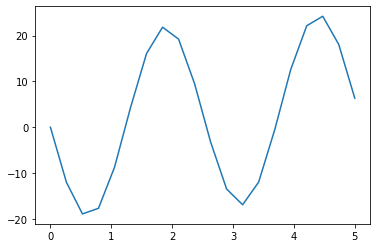

In [35]:
plt.plot(x, fx)
plt.show()

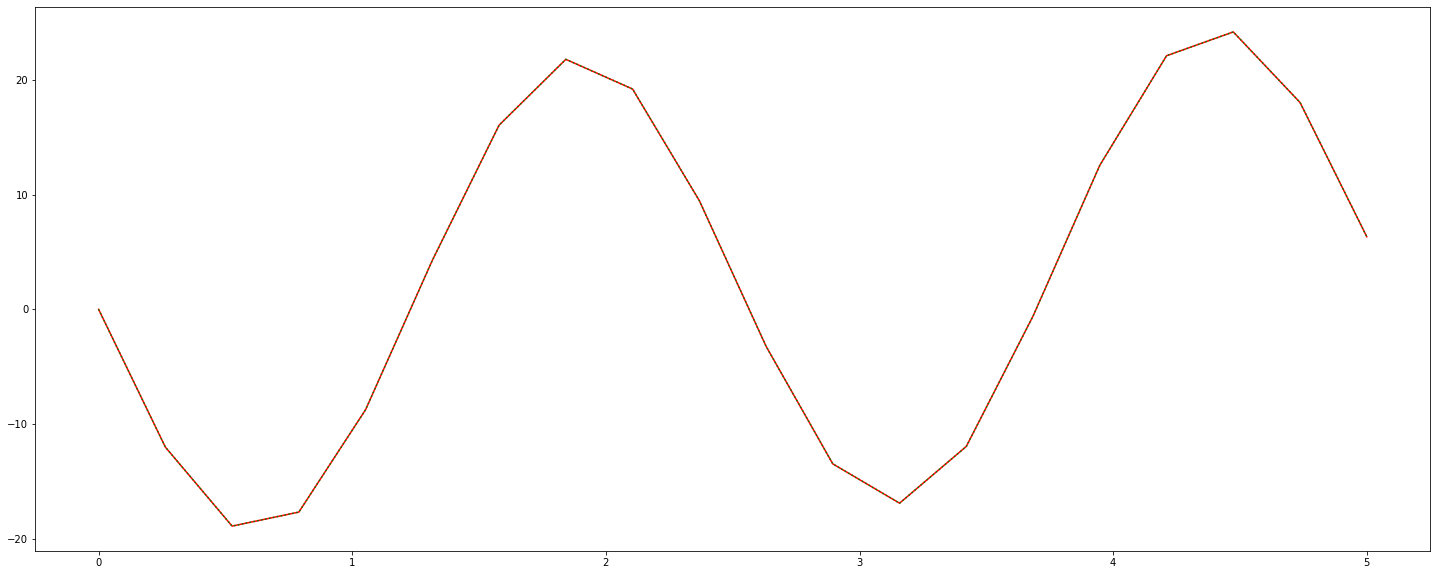

In [55]:
# Понятно все, кроме того какие брать init point / начальные значения. Откуда их придумывать?
ab = minimize(error, (0,0), method='COBYLA')
error(ab.x)
resfx = [f(xx, ab.x[0], ab.x[1]) for xx in x]

plt.figure(figsize=[25, 10])
plt.plot(x, fx, 'r', x, resfx, 'g:')
plt.show()

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [ ]:
xd = [71,43,8,45,93,2,15,23,96,156,120,32,88,66,22,74,57,26,111,19]

fig, ax = plt.subplots(1, 1)

ax.figure.set_size_inches(25, 20)

ax.set_ylim([0, 0.1])
ax.set_xlim([35, 85])

ma = []
for number in range(1000):
    arr = np.random.choice(xd, size=(1, 50))
    ma.append(arr.mean())
ax.hist(ma, density=True, label='Среднее 1000 выборок по 50')
plt.title('NORMAL')
ax.legend(loc='best', frameon=False)
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [ ]:
m = np.array([[1, 4],
              [1, 1]])

x, y = np.linalg.eig(m)

i=0
while i < len(x):
    print(f'Собственное значение: {x[i]}, соответствующий вектор: {y[i]}')
    i+=1